In [ ]:
# Measuring Up: NYC midterm project

In [2]:
import pandas as pd
from scipy import stats
from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the math_test_results csv file as a panda dataframe names df_test_scores
df_test_scores = pd.read_csv("math_test_results_2013_2019.csv")

In [4]:
# Review size of dataset
print(df_test_scores.shape)

(32606, 18)


In [5]:
# Review dataframe info
df_test_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32606 entries, 0 to 32605
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed Column    32606 non-null  object
 1   DBN               32606 non-null  object
 2   School Name       32606 non-null  object
 3   Grade             32606 non-null  object
 4   Year              32606 non-null  int64 
 5   Category          32606 non-null  object
 6   Number Tested     32606 non-null  int64 
 7   Mean Scale Score  32606 non-null  object
 8   # Level 1         32606 non-null  object
 9   % Level 1         32606 non-null  object
 10  # Level 2         32606 non-null  object
 11  % Level 2         32606 non-null  object
 12  # Level 3         32606 non-null  object
 13  % Level 3         32606 non-null  object
 14  # Level 4         32606 non-null  object
 15  % Level 4         32606 non-null  object
 16  # Level 3+4       32606 non-null  object
 17  % Level 3+4 

In [6]:
# Review headers and sample of data to better understand relevant data points for the analysis
print(df_test_scores.head())

            Unnamed Column     DBN                School Name Grade  Year  \
0  01M01532013All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2013   
1  01M01532014All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2014   
2  01M01532015All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2015   
3  01M01532016All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2016   
4  01M01532017All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2017   

       Category  Number Tested Mean Scale Score # Level 1 % Level 1 # Level 2  \
0  All Students             27              278        16      59.3        11   
1  All Students             18              286         6      33.3         9   
2  All Students             17              280        10      58.8         4   
3  All Students             21              275        13      61.9         4   
4  All Students             29              302         8      27.6         9   

  % Level 2 # Level 3 % Level 3 # Level 4 % Level 

In [7]:
# Drop columns not relevant to the analysis
df_test_scores = df_test_scores.drop(['# Level 1', '% Level 1', '# Level 2', '% Level 2', '# Level 3', '% Level 3', '# Level 4', '% Level 4', '# Level 3+4', '% Level 3+4'], axis=1)

In [8]:
print(df_test_scores.head())

            Unnamed Column     DBN                School Name Grade  Year  \
0  01M01532013All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2013   
1  01M01532014All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2014   
2  01M01532015All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2015   
3  01M01532016All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2016   
4  01M01532017All Students  01M015  P.S. 015 ROBERTO CLEMENTE     3  2017   

       Category  Number Tested Mean Scale Score  
0  All Students             27              278  
1  All Students             18              286  
2  All Students             17              280  
3  All Students             21              275  
4  All Students             29              302  


In [9]:
# check the dataset for null values
print(df_test_scores.isnull().sum())

Unnamed Column      0
DBN                 0
School Name         0
Grade               0
Year                0
Category            0
Number Tested       0
Mean Scale Score    0
dtype: int64


In [10]:
# Mean Scale Score is showing data type "Object".  I would expect integers.
# Review discreet values in the Mean Scale Score column for non int64 values using the .unique() function
df_test_scores['Mean Scale Score'].unique()

array(['278', '286', '280', '275', '302', '616', '606', '277', '282',
       '281', '304', '301', '603', '611', '274', '266', '283', '322',
       '602', '276', '307', '607', '311', '303', '316', '313', '601',
       '605', '289', '315', '324', '594', 's', '297', '326', '317', '310',
       '308', '318', '600', '296', '299', '285', '588', '591', '294',
       '300', '291', '293', '595', '597', '290', '298', '287', '598',
       '292', '593', '596', '305', '589', '585', '288', '586', '583',
       '295', '587', '584', '592', '312', '309', '599', '590', '319',
       '329', '339', '620', '320', '337', '614', '618', '330', '335',
       '321', '325', '615', '306', '582', '273', '270', '268', '579',
       '580', '261', '271', '323', '334', '332', '349', '338', '613',
       '344', '346', '619', '342', '353', '352', '345', '626', '347',
       '341', '340', '343', '623', '621', '354', '355', '360', '279',
       '284', '260', '608', '350', '610', '328', '336', '617', '609',
       '269', '

In [11]:
# Remove rows with non numeric values, such as 's'
# Step 1: using the pandas function pd.to_numeric(), pass the errors=coerce parameter, to convert the column to numeric values and convert non-numeric values to NaN 
df_test_scores['Mean Scale Score'] = pd.to_numeric(df_test_scores['Mean Scale Score'], errors= 'coerce')

# Step 2: Drop NaN values from the Mean Scale Score column
df_test_scores.dropna(subset=['Mean Scale Score'], inplace=True)

# Convert the column to int64
df_test_scores['Mean Scale Score'] = df_test_scores['Mean Scale Score'].astype('int64')

# View the results to confirm no NaNs and that data type = int64
df_test_scores['Mean Scale Score'].unique()

array([278, 286, 280, 275, 302, 616, 606, 277, 282, 281, 304, 301, 603,
       611, 274, 266, 283, 322, 602, 276, 307, 607, 311, 303, 316, 313,
       601, 605, 289, 315, 324, 594, 297, 326, 317, 310, 308, 318, 600,
       296, 299, 285, 588, 591, 294, 300, 291, 293, 595, 597, 290, 298,
       287, 598, 292, 593, 596, 305, 589, 585, 288, 586, 583, 295, 587,
       584, 592, 312, 309, 599, 590, 319, 329, 339, 620, 320, 337, 614,
       618, 330, 335, 321, 325, 615, 306, 582, 273, 270, 268, 579, 580,
       261, 271, 323, 334, 332, 349, 338, 613, 344, 346, 619, 342, 353,
       352, 345, 626, 347, 341, 340, 343, 623, 621, 354, 355, 360, 279,
       284, 260, 608, 350, 610, 328, 336, 617, 609, 269, 267, 581, 255,
       263, 272, 314, 356, 368, 365, 370, 630, 629, 367, 364, 631, 371,
       634, 357, 363, 351, 348, 359, 622, 358, 366, 628, 327, 604, 333,
       331, 612, 624, 361, 627, 632, 636, 369, 633, 362, 625, 264, 253,
       578, 574, 242, 265, 576, 262, 577, 256, 638, 376, 372, 37

In [12]:
# Check for duplicate rows
print("Duplicate Rows:", df_test_scores.duplicated().sum())

Duplicate Rows: 0


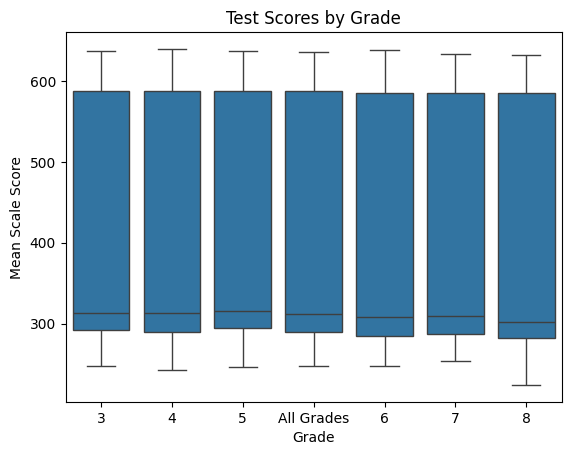

In [13]:
# Create a box plot to identify outliers in Mean Test Scores by Grade
sns.boxplot(x='Grade', y='Mean Scale Score', data=df_test_scores)
plt.title("Test Scores by Grade")
plt.show()


In [14]:
# based on the box plot the data appears to show a normal distribution
# use the z score method for a deeper dive into possible outliers
# Define a function with parameters df and column to identify 
    # z_scores in a specified column
def identify_outliers(df,column):
    # Calculate Z-score
    z_scores = stats.zscore(df[column])
    # Find absolute Z-scores > 3
    outliers = df[abs(z_scores) > 3]
    return outliers


In [15]:
identify_outliers(df_test_scores,'Mean Scale Score')

,Unnamed Column,DBN,School Name,Grade,Year,Category,Number Tested,Mean Scale Score


In [16]:
# Review the Category column values to better understand this data field
df_test_scores['Category'].unique()

array(['All Students'], dtype=object)

In [17]:
# Next we will prepare the Class Size datasets 

In [18]:
# Import the average_class_size csv files as a panda dataframes name df_schools_17_18 and df_schools_18_19 
df_schools_17_18 = pd.read_csv("average_class_size_17_18.csv")

In [19]:
df_schools_18_19 = pd.read_csv("average_class_size_18_19.csv")

In [20]:
print(df_schools_17_18.head())

      DBN              School Name Grade Level Program Type  \
0  01M015  PS 015 ROBERTO CLEMENTE           K          G&T   
1  01M015  PS 015 ROBERTO CLEMENTE           K          ICT   
2  01M015  PS 015 ROBERTO CLEMENTE           1          G&T   
3  01M015  PS 015 ROBERTO CLEMENTE           1          ICT   
4  01M015  PS 015 ROBERTO CLEMENTE           2          G&T   

   Number of Students  Number of Classes  Average Class Size  \
0                   8                  1                 8.0   
1                  20                  1                20.0   
2                  11                  1                11.0   
3                  21                  1                21.0   
4                  15                  1                15.0   

   Minimum Class Size  Maximum Class Size  
0                   8                   8  
1                  20                  20  
2                  11                  11  
3                  21                  21  
4               

In [21]:
# review the dataframe shapes
print(df_schools_17_18.shape)

(12372, 9)


In [22]:
print(df_schools_18_19.shape)

(12423, 9)


In [23]:
# add year columns to the Class Size datasets
# the 2017-2018 school year = 2018, 2018-2019 school year =2019
df_schools_17_18['Year'] = 2018
df_schools_18_19['Year'] = 2019

In [24]:
# combine into one pandas dataframe as df_schools 
df_schools = pd.concat([df_schools_17_18, df_schools_18_19], ignore_index=True)

In [25]:
# review values in the added Year columns to confirm expected values of 2018 and 2019
df_schools['Year'].unique()

array([2018, 2019], dtype=int64)

In [26]:
# Review combined dataframe shape to confirm total number of rows total of the two combined dataframes of 24,795 = (12,372 + 12,423) 
print(df_schools.shape)

(24795, 10)


In [27]:
# check for nulls
print(df_schools.isnull().sum())

DBN                   0
School Name           0
Grade Level           0
Program Type          0
Number of Students    0
Number of Classes     0
Average Class Size    0
Minimum Class Size    0
Maximum Class Size    0
Year                  0
dtype: int64


In [28]:
# review dataframe info
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24795 entries, 0 to 24794
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DBN                 24795 non-null  object 
 1   School Name         24795 non-null  object 
 2   Grade Level         24795 non-null  object 
 3   Program Type        24795 non-null  object 
 4   Number of Students  24795 non-null  int64  
 5   Number of Classes   24795 non-null  int64  
 6   Average Class Size  24795 non-null  float64
 7   Minimum Class Size  24795 non-null  object 
 8   Maximum Class Size  24795 non-null  object 
 9   Year                24795 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.9+ MB


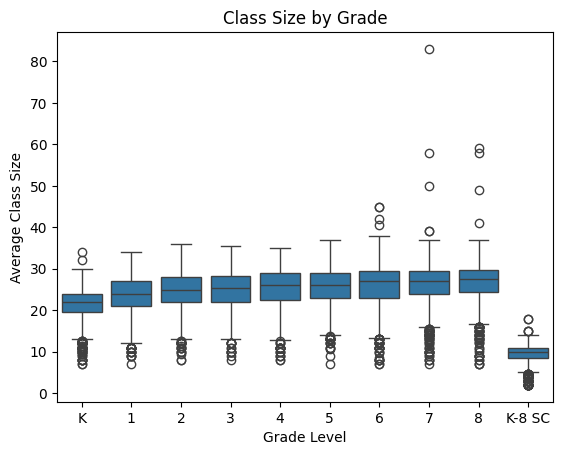

In [29]:
# Create a box plot to identify outliers in Class Size
sns.boxplot(x='Grade Level', y='Average Class Size', data=df_schools)
plt.title("Class Size by Grade")
plt.show()

In [30]:
identify_outliers(df_schools,'Average Class Size')

,DBN,School Name,Grade Level,Program Type,Number of Students,Number of Classes,Average Class Size,Minimum Class Size,Maximum Class Size,Year
5037,15K497,SCHOOL FOR INTERNATIONAL STUDIES,7,Gen Ed,83,1,83.0,83,83,2018
5040,15K497,SCHOOL FOR INTERNATIONAL STUDIES,8,ICT,59,1,59.0,59,59,2018
7884,24Q560,"ROBERT F WAGNER, JR SECONDARY SCHOOL FOR ARTS ...",6,ICT,45,1,45.0,45,45,2018
7885,24Q560,"ROBERT F WAGNER, JR SECONDARY SCHOOL FOR ARTS ...",7,ICT,58,1,58.0,58,58,2018
7886,24Q560,"ROBERT F WAGNER, JR SECONDARY SCHOOL FOR ARTS ...",8,Gen Ed,49,1,49.0,49,49,2018
...,...,...,...,...,...,...,...,...,...,...
24540,27Q333,GOLDIE MAPLE ACADEMY,K-8 SC,SC 12:1:1,4,1,4.0,<6,<6,2019
24614,29Q192,IS 192 THE LINDEN,K-8 SC,SC 12:1,4,1,4.0,<6,<6,2019
24622,29Q259,PATHWAYS COLLEGE PREPARATORY SCHOOL: A COLLEGE...,K-8 SC,SC 12:1:1,7,2,3.5,<6,<6,2019
24644,30Q078,PS/IS 78Q,K-8 SC,SC 12:1:1,3,1,3.0,<6,<6,2019


In [31]:
# Remove outlier rows from the df_schools dataframe
z_scores = stats.zscore(df_schools['Average Class Size'])
df_schools = df_schools[abs(z_scores) <= 3]

In [32]:
# Review df_schools shape to confirm total number of rows 
    # = 24,714 (24,795 - 81 (outliers))  
print(df_schools.shape)

(24714, 10)


In [33]:
# Now we will combine the df_test_scores and df_schools dataframes to perform analysis
# Common fields between the dataframes include School Name, DBN, Year and Grade ("Grade Level" in df_schools)

In [34]:
# review unique grade level values to validate column data 
# identify common grade levels between the two datasets

In [35]:
df_test_scores['Grade'].unique()

array(['3', '4', '5', 'All Grades', '6', '7', '8'], dtype=object)

In [36]:
df_schools['Grade Level'].unique()

array(['K', '1', '2', '3', '4', '5', '6', '7', '8', 'K-8 SC'],
      dtype=object)

In [37]:
# Review values of the df_test_scores [Year] column to identify years outside of 2017 or 2018 that are not relevant to the analysis
df_test_scores['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [38]:
# Drop rows with grades and years that are unique to the df_test_scores test set Year or Grade
# Review Unique Values of each column to confirm rows were dropped
year_to_drop_test_scores = [2013, 2014, 2015, 2016, 2017]
grade_to_drop_test_scores = ['All Grades']

df_test_scores.drop(
    df_test_scores[
        df_test_scores['Year'].isin(year_to_drop_test_scores) |
        df_test_scores['Grade'].isin(grade_to_drop_test_scores)
    ].index, inplace=True)

df_test_scores['Year'].unique()

array([2018, 2019], dtype=int64)

In [39]:
df_test_scores['Grade'].unique()

array(['3', '4', '5', '6', '7', '8'], dtype=object)

In [40]:
# Drop rows with grades and years that are unique to the df_test_scores test set Year or Grade

grade_to_drop_schools = ['K', '1', '2', 'K-8 SC']

df_schools.drop(
    df_schools[df_schools['Grade Level'].isin(grade_to_drop_schools)].index, inplace=True)

In [41]:
df_schools['Grade Level'].unique()

array(['3', '4', '5', '6', '7', '8'], dtype=object)

In [42]:
# Drop rows with values other than 'Gen Ed' in df_schools 'Program Type" column
# Review unique values to confirm drop
df_schools.drop(df_schools[df_schools['Program Type'] !="Gen Ed"].index, inplace=True)
df_schools['Program Type'].unique()

array(['Gen Ed'], dtype=object)

In [43]:
# Compare values in the common field columns to validate consistency in values
merged_df = pd.merge(df_schools[['DBN', 'Year']], df_test_scores[['DBN', 'Year']],
                     on=['DBN', 'Year'], how='outer', indicator=True)
mismatches = merged_df[merged_df['_merge'] != 'both']

print("Rows unique to either DataFrame")
print(mismatches)

Rows unique to either DataFrame
          DBN  Year      _merge
895    03M208  2018   left_only
896    03M208  2018   left_only
1063   04M050  2018   left_only
1064   04M050  2018   left_only
1272   04M406  2018   left_only
...       ...   ...         ...
24108  30Q286  2018  right_only
24109  30Q286  2019  right_only
24110  30Q286  2019  right_only
24111  31R010  2019  right_only
24112  31R010  2019  right_only

[340 rows x 3 columns]


In [44]:
merged_df['DBN'].unique()

array(['01M015', '01M019', '01M020', ..., '25Q281', '26Q186', '30Q286'],
      dtype=object)

In [45]:
# Change the name of the 'Grade Level' column in df_schools to 'Grade', consistent with df_test_scores column header
df_schools.rename(columns={'Grade Level' : 'Grade'}, inplace=True)

In [46]:
# Perform an inner join on df_schools and df_test_scores to combine the datasets for analysis
df_nyc_project = pd.merge(df_schools, df_test_scores, on=['DBN', 'Year', 'Grade'])

In [47]:
# Review size of dataset to confirm the joined df has less rows than either original dataset
print(df_nyc_project.shape)

(6513, 15)


In [48]:
print(df_schools.shape)

(6676, 10)


In [49]:
print(df_test_scores.shape)

(7270, 8)


In [50]:
# Review dataframe info
df_nyc_project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DBN                 6513 non-null   object 
 1   School Name_x       6513 non-null   object 
 2   Grade               6513 non-null   object 
 3   Program Type        6513 non-null   object 
 4   Number of Students  6513 non-null   int64  
 5   Number of Classes   6513 non-null   int64  
 6   Average Class Size  6513 non-null   float64
 7   Minimum Class Size  6513 non-null   object 
 8   Maximum Class Size  6513 non-null   object 
 9   Year                6513 non-null   int64  
 10  Unnamed Column      6513 non-null   object 
 11  School Name_y       6513 non-null   object 
 12  Category            6513 non-null   object 
 13  Number Tested       6513 non-null   int64  
 14  Mean Scale Score    6513 non-null   int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 763.4+

In [51]:
# Convert Grade to int64 then verify the change
df_nyc_project['Grade'] = df_nyc_project['Grade'].astype('Int64')
df_nyc_project['Grade'].unique()

<IntegerArray>
[4, 5, 3, 6, 8, 7]
Length: 6, dtype: Int64

In [52]:
print(df_nyc_project.head())

      DBN            School Name_x  Grade Program Type  Number of Students  \
0  01M015  PS 015 ROBERTO CLEMENTE      4       Gen Ed                   9   
1  01M019        PS 019 ASHER LEVY      4       Gen Ed                  23   
2  01M019        PS 019 ASHER LEVY      5       Gen Ed                  22   
3  01M020       PS 020 ANNA SILVER      3       Gen Ed                  54   
4  01M020       PS 020 ANNA SILVER      4       Gen Ed                  20   

   Number of Classes  Average Class Size Minimum Class Size  \
0                  1                 9.0                  9   
1                  1                23.0                 23   
2                  1                22.0                 22   
3                  3                18.0                 15   
4                  1                20.0                 20   

  Maximum Class Size  Year           Unnamed Column  \
0                  9  2018  01M01542018All Students   
1                 23  2018  01M01942018All

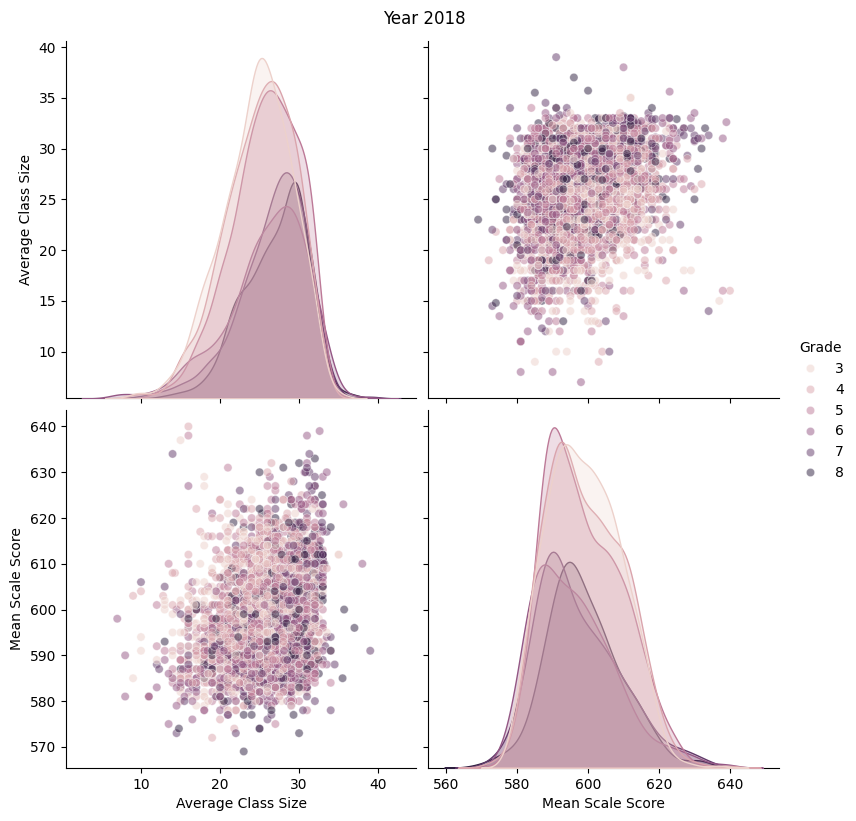

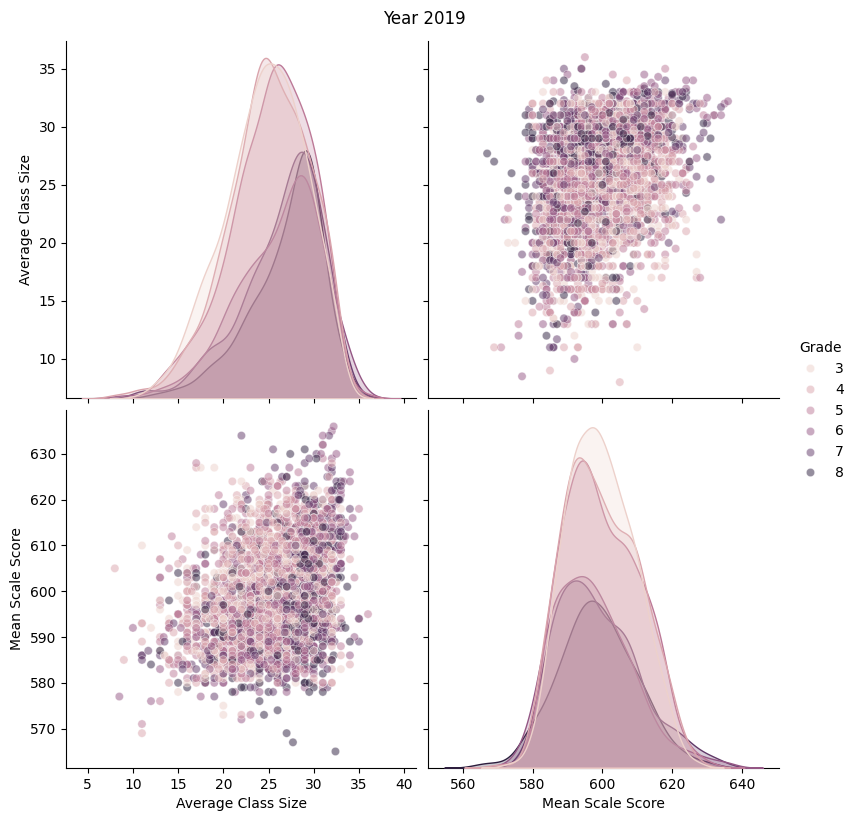

In [53]:
# Create a Seaborn pairplot to visualize Class Size and Test Score 
    # relationship in scatter plots, and Class size and Test Score
    # distribution in density plots
# Separate pairplot for each year 
unique_years = df_nyc_project['Year'].unique()

for year in unique_years:
    df_year = df_nyc_project[df_nyc_project['Year'] == year]
    # Create the pairplot  
    sns.pairplot(df_year, vars=['Average Class Size', 'Mean Scale Score'], 
                 hue='Grade', height=4, plot_kws={'alpha':0.5})
    plt.suptitle(f'Year {year}', y=1.02)
    plt.show()

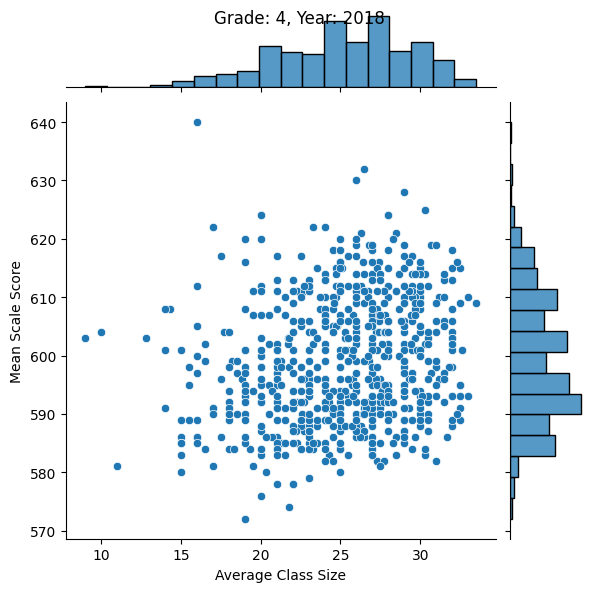

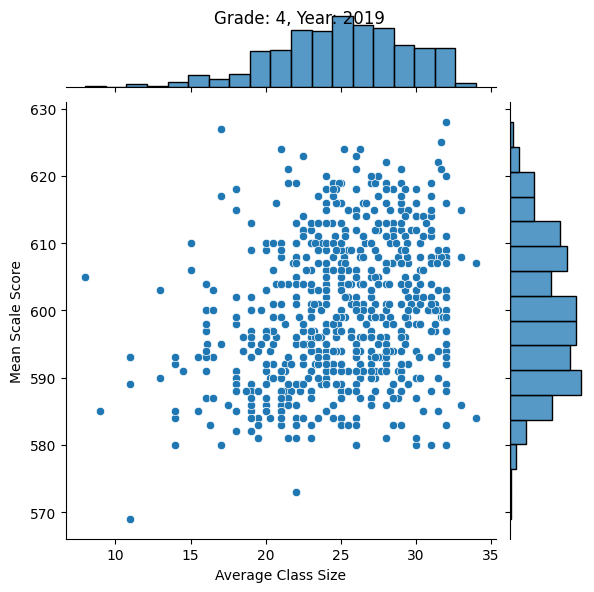

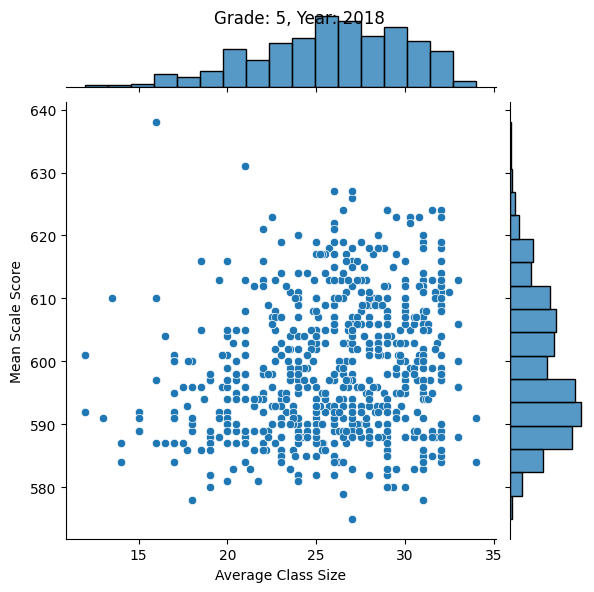

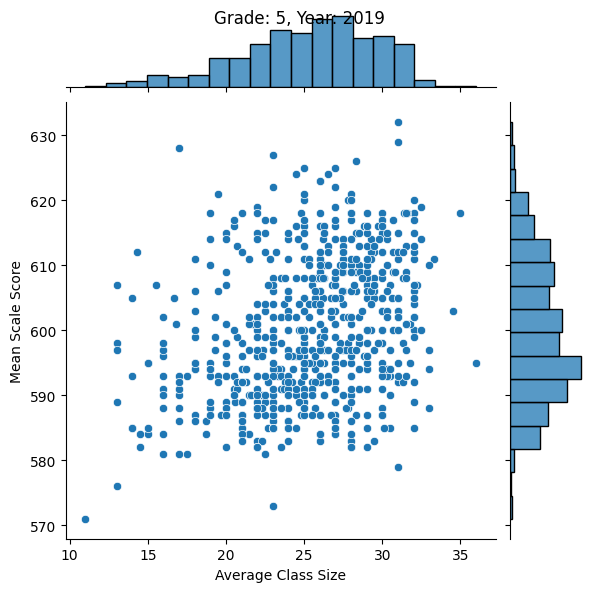

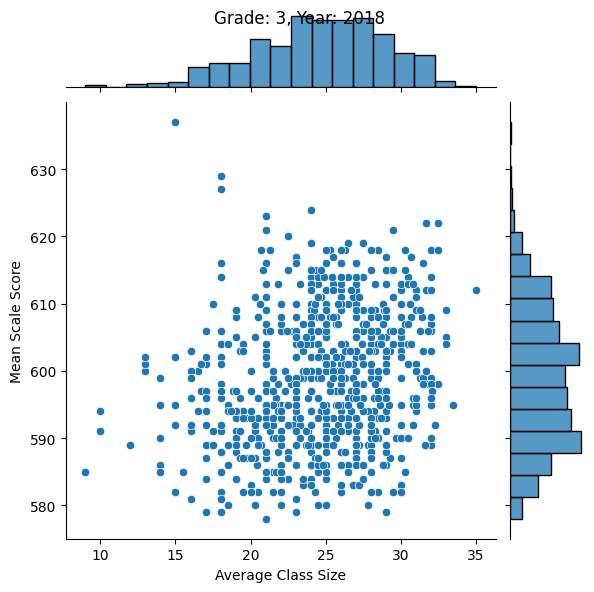

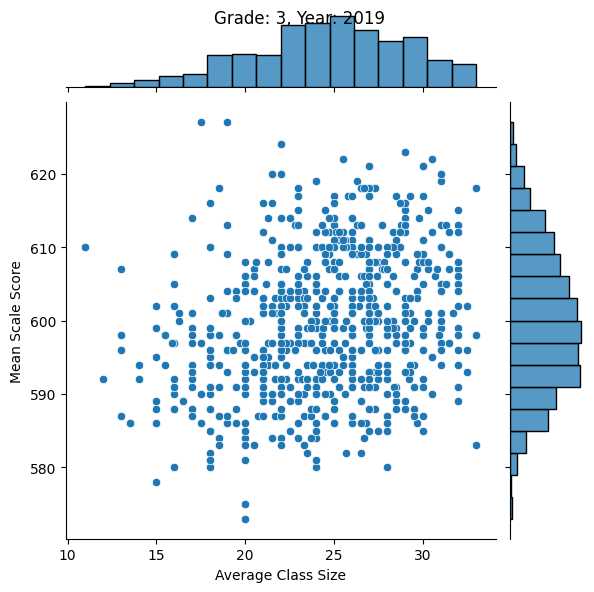

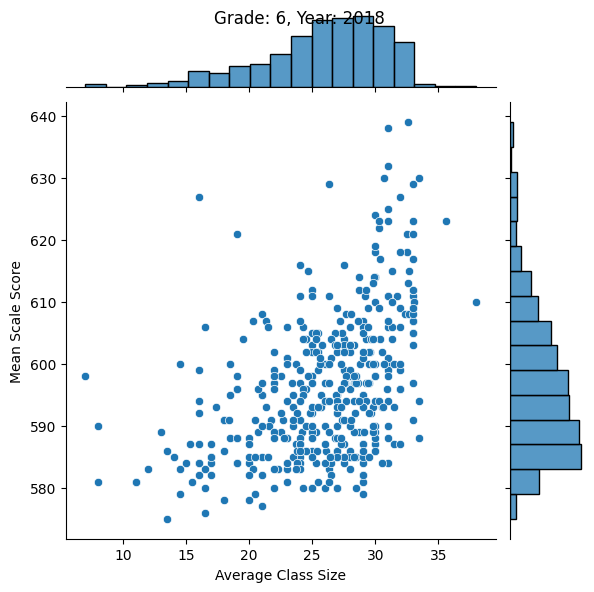

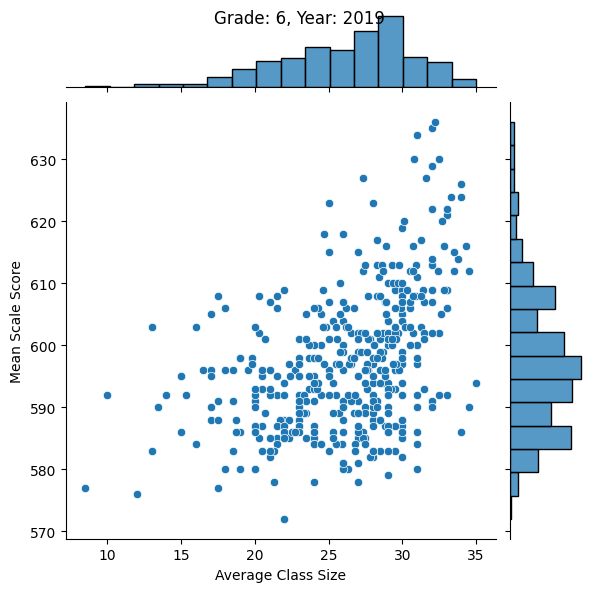

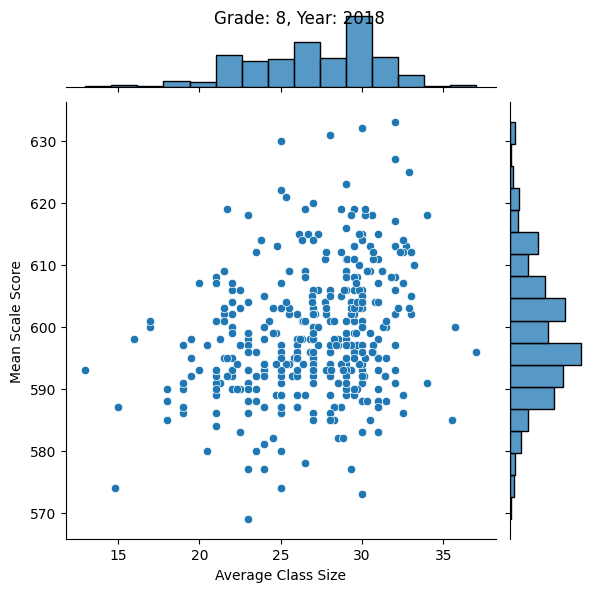

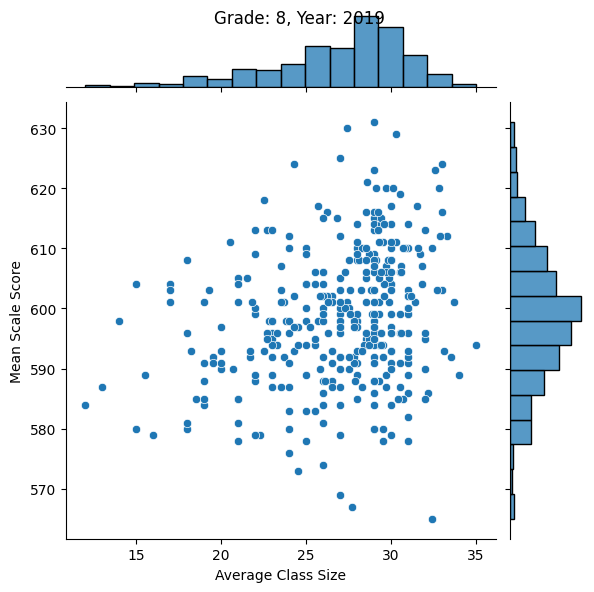

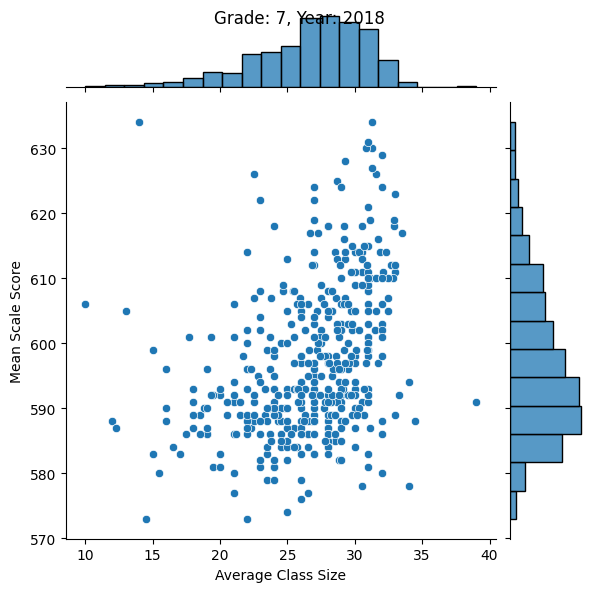

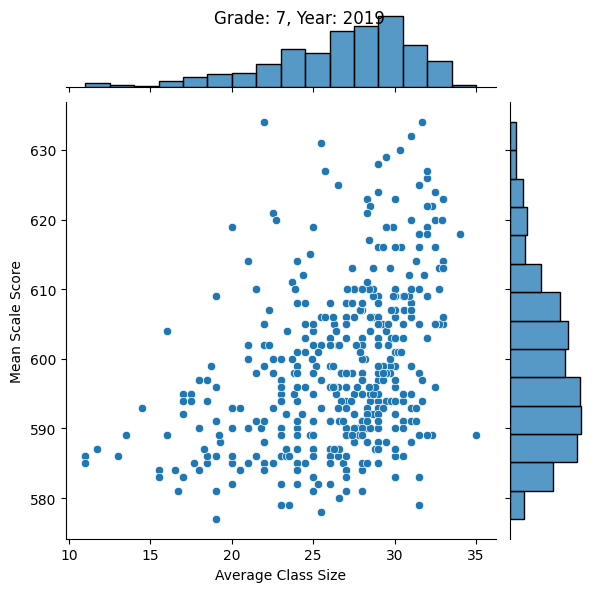

In [54]:
for grade in df_nyc_project['Grade'].unique():
    for year in df_nyc_project['Year'].unique():
        sns.jointplot(data=df_nyc_project[(df_nyc_project['Grade'] == grade) & (df_nyc_project['Year'] == year)],
            x='Average Class Size', y='Mean Scale Score', kind='scatter')
        plt.suptitle(f'Grade: {grade}, Year: {year}')
        plt.show
                                                                               
    

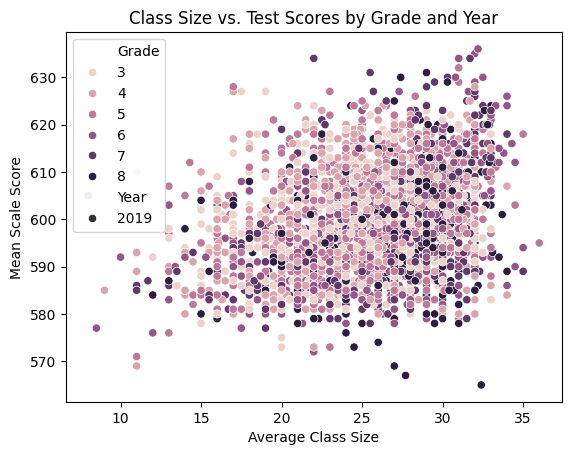

In [55]:
sns.scatterplot(data=df_year, x='Average Class Size', y='Mean Scale Score', hue='Grade', style = 'Year')
plt.title('Class Size vs. Test Scores by Grade and Year')
plt.show()

In [56]:
correlation = df_nyc_project['Average Class Size'].corr(df_nyc_project['Mean Scale Score'])
print(correlation)

0.2775181601539672


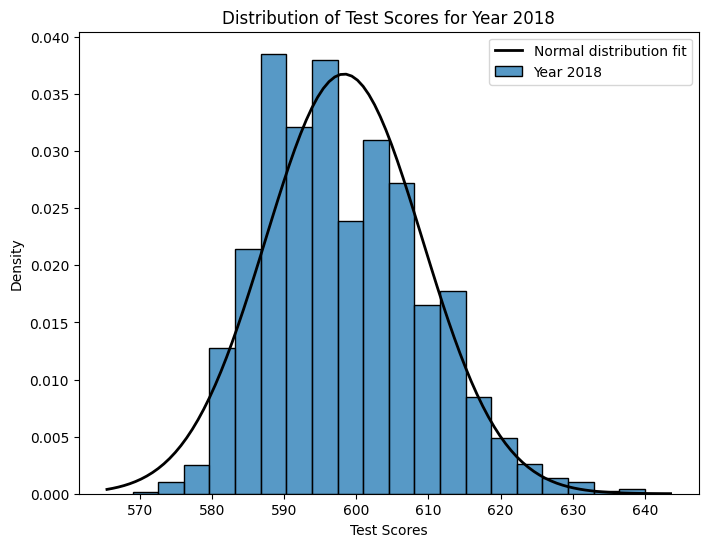

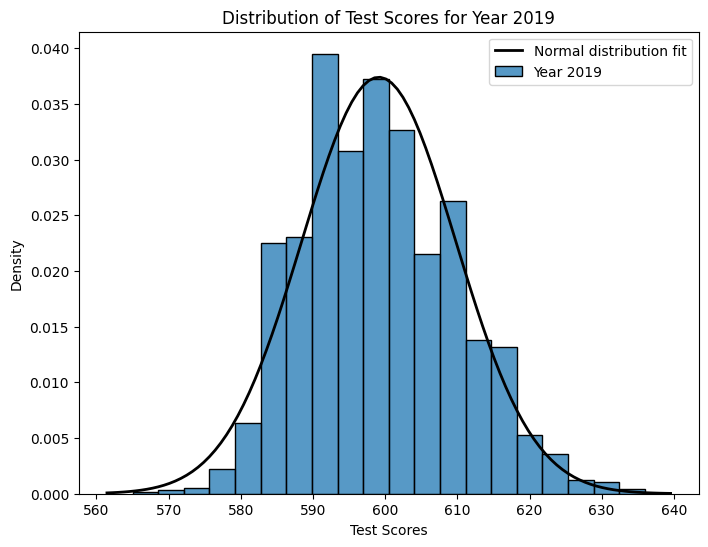

In [57]:
unique_years = df_nyc_project['Year'].unique()

for year in unique_years:
    plt.figure(figsize=(8, 6))
    subset = df_nyc_project[df_nyc_project['Year'] == year]['Mean Scale Score']

    sns.histplot(subset, kde=False, stat="density", label=f'Year {year}', bins=20)
    
    mean, std = norm.fit(subset)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2, label='Normal distribution fit')

    title = f'Distribution of Test Scores for Year {year}'
    plt.title(title)
    plt.xlabel('Test Scores')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

In [58]:
for year in unique_years:
    subset = df_nyc_project[df_nyc_project['Year'] == year]['Mean Scale Score']
    skewness = subset.skew()
    print(f'Skewness of test scores for Year {year}: {skewness}')

Skewness of test scores for Year 2018: 0.4782900020848386
Skewness of test scores for Year 2019: 0.34039302956165807


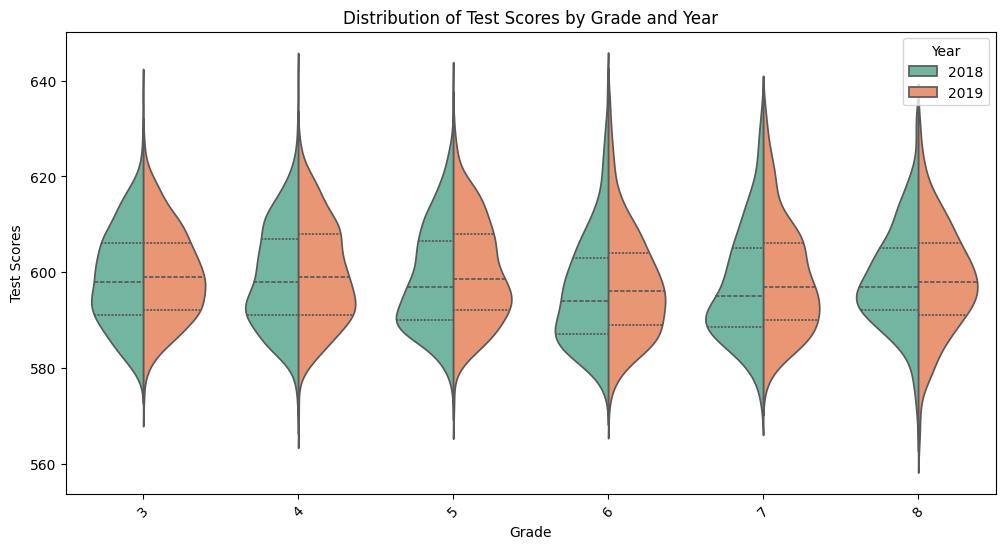

In [59]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Grade', y='Mean Scale Score', 
               hue='Year', data=df_nyc_project, 
               split=True, inner="quartile", palette='Set2')
plt.title('Distribution of Test Scores by Grade and Year')
plt.ylabel('Test Scores')
plt.xlabel('Grade')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


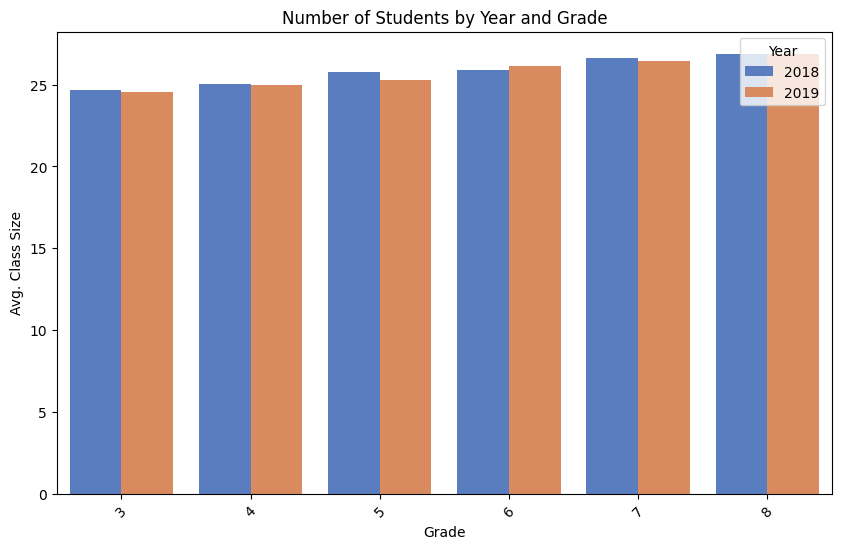

In [60]:
# Create a bar chart to visualize Avg. Class size by Grade and Year
plt.figure(figsize=(10,6))

# Sort x-axis 'Grade' in numeric order 
grades_sorted = sorted(df_nyc_project['Grade'].unique())

sns.barplot(x='Grade', y='Average Class Size', hue='Year', data=df_nyc_project, 
            order=grades_sorted, errorbar=None, palette='muted')

plt.xticks(rotation=45)
plt.title('Number of Students by Year and Grade')
plt.xlabel('Grade')
plt.ylabel('Avg. Class Size')
plt.legend(title='Year')
plt.show()